# Toss-up Dice Game:
## A look at certain strategies by Monti Carlo Simulation 
Toss-up is a game played with 10 regular D6 dice, but each dice is labeled with 3 green sides, 2 yellow sides, and 1 red side (as shown below). For those who have never played this game, the full instructions on gameplay can be found here: https://www.playmonster.com/wp-content/uploads/2018/06/TossUP-RulesTwistTumble.pdf
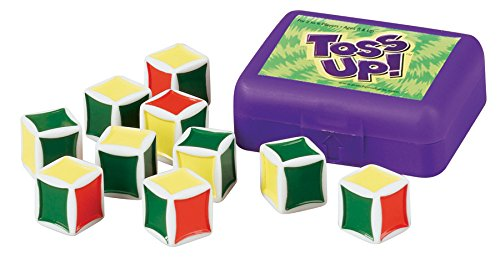


Though this game is simple, analysis into the optimal playing strategy is an instructive example of how Monti Carlo simulations can be useful. Below, we will run such simulations of the game playing out under certain strategies. To sum up the rules of the game, the objective is to roll as many green sides as possible, while avoiding red-sided rolls. Once a green side has been rolled, that dice can be left as is and counts towards ones point talley. One can roll all of the dice at once, and can continue to roll remaining dice after removing any green rolls, with the goal of eventually rolling all 10 dice as green. The only condition stopping them from doing this is if at least one red side is rolled while simultaneously $\textit{not}$ rolling any green sides; if this occurs then the player's turn is over and any green dice won previously are lost. In that sense, any green rolls keep you from losing.

Here we want to ask the following: If one starts out with 10 dice, and their strategy is to continue tossing their dice until either they lose, or they roll at least x out 10 dice as green, then what is their chance of sucessfully doing so. The analytical solution to this question may be found by considering the conditional probabilities behind all possible outcomes of rolls and re-rolls, and combining them using $\textit{Bayes' Formula}$. This method of solving is certainly not a trivial one, and it is arguably more simple to run Monti Carlo Simulations to find the winning probabilities.


In [27]:
import matplotlib.pyplot as pyt 
import numpy as np
import matplotlib as mpl
import random as r
import time

# Here we define the game. Inputs are total dice (N), and number of dice desired to win (x).
def tossup(x = 10,N = 10,gamemode=0):
    # Probability to roll a certain side in a single roll
    G = 1/2
    Y = 1/3
    R = 1 - G - Y
    
    # start with N dice
    die = [None]*N
    win = 1
    
    # This while loop will run until either it rolls a losing combination, or it wins (or removes) x out of N dice.
    # After the loop terminates, win is returned, and indicates which of these happened.
    while win == 1:
        # Randomly assign a roll to each die
        for i in range(len(die)):
            roll = r.random()
            if roll < G: 
                die[i] = 'Green'
            elif roll < (G + Y):
                die[i] = 'Yellow'
            else:
                die[i] = 'Red'
        
        if gamemode == 1:
            print('Rolling')
            time.sleep(1)
            print(f'Your roll was {die}')
            time.sleep(2)
        
        # Losing state
        if any(d == 'Red' for d in die) and not any(d == 'Green' for d in die):
            win = 0
        # Removes Green rolls
        die[:] = (d for d in die if d!='Green')        
        # Winning state
        if len(die) <= (N - x):
            break
    return win

# Simulating many games
W = 0
games = 100000
x = 10
N = 10
for i in range(games):
    W += tossup(x,N)

rate = W / games
# Standard error of proportion
stERR = np.sqrt((rate)*(1-rate) / games)
print(f'If one were to try to win {x} dice out of {N}, then their probability of success would be {rate} plus or minus {stERR}.')

If one were to try to win 10 dice out of 10, then their probability of success would be 0.69967 plus or minus 0.0014495926707182262.


$\sigma_P = \sqrt(\frac{(P)(1-P)}{N})$ is the standard deviation of a binomial distribution, where $p$ is the probability of a certain outcome occuring.

With this simulation, we can consider strategies for the game with more than 10 dice, or for a game with different probabilities for the 3 colors. Gamemode illustrates the game being played out in real time.

In [13]:
H = tossup(N = 21, x = 21, gamemode = 1)
if H == 1:
    print('You won!')
else:
    print('Sorry. You lost.')

Rolling
Your roll was ['Green', 'Red', 'Yellow', 'Green', 'Green', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Green', 'Yellow', 'Green', 'Yellow', 'Red', 'Green', 'Green', 'Green', 'Yellow', 'Yellow', 'Yellow', 'Yellow']
Rolling
Your roll was ['Red', 'Yellow', 'Green', 'Green', 'Green', 'Yellow', 'Red', 'Green', 'Yellow', 'Green', 'Green', 'Green', 'Yellow']
Rolling
Your roll was ['Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Red']
Sorry. You lost.
